In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools


# <span style="color:green">Creating a Directed Graph</span>

* A directed graph is stored in an adjacency list format
* every node points to two list of nodes 
    * **Forward Nodes** : first one containing nodes it is pointing to
    * **Backward Nodes** : second one containg nodes that point to that node

### <span style="color:blue">input directed Graph</span>

In [2]:
sampleGraph = {
    "a":[["b","c"],[]],
    "b":[["c","e"],["a","d"]],
    "c":[["f","g"],["a","b"]],
    "d":[["b"],["e"]],
    "e":[["d"],["b","h"]],
    "f":[["h"],["c"]],
    "g":[[],["c","h"]],
    "h":[["e","g"],["f"]]
              }

In [3]:
sampleGraph

{'a': [['b', 'c'], []],
 'b': [['c', 'e'], ['a', 'd']],
 'c': [['f', 'g'], ['a', 'b']],
 'd': [['b'], ['e']],
 'e': [['d'], ['b', 'h']],
 'f': [['h'], ['c']],
 'g': [[], ['c', 'h']],
 'h': [['e', 'g'], ['f']]}

### helper function to plot the graph:


In [7]:
def graphPlot(tree):
    
    # initializing as a digraph object i.e.directed graph
    treeGraph = nx.DiGraph()
        
    for key in tree.keys():
        treeGraph.add_node(key)
        for child in tree[key][0]:
            treeGraph.add_edge(key,child) # order is important 
    
    nx.draw_spring(treeGraph,with_labels=True)
    plt.show()



#### plotting the graph

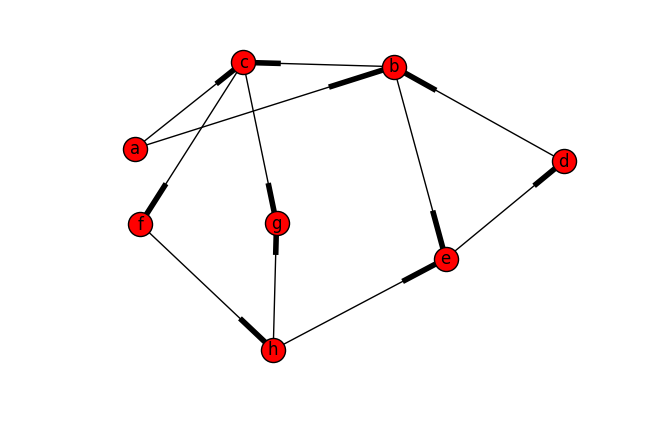

In [8]:
graphPlot(sampleGraph)

# <span style="color:green">Graph Traversal</span>

## <span style="color:blue">Breadth First search : </span>

#### helper function

In [17]:
def BFS(root,Graph):
    Tree = {}
    Discovered = {nodes : False for nodes in Graph.keys()}
    Discovered[root] = True
    Layers = {}
    Layers[0] = [root]
    i = 0
    while len(Layers[i]) != 0 :
        Layers[i+1] = []
        for node in Layers[i]:
            Tree[node] = []
            for child in Graph[node][0]:
                if Discovered[child]==False:
                    Tree[node].append(child)
                    Layers[i+1].append(child)
                    Discovered[child]=True
            Tree[node] = [Tree[node],Graph[node][1]]    # appending the Backward nodes into the BFS tree nodes
        i=i+1
    return Tree,Layers

In [18]:
bfsTree,bfsLayers = BFS("a",sampleGraph)

In [19]:
bfsTree

{'a': [['b', 'c'], []],
 'b': [['e'], ['a', 'd']],
 'c': [['f', 'g'], ['a', 'b']],
 'd': [[], ['e']],
 'e': [['d'], ['b', 'h']],
 'f': [['h'], ['c']],
 'g': [[], ['c', 'h']],
 'h': [[], ['f']]}

In [20]:
sampleGraph

{'a': [['b', 'c'], []],
 'b': [['c', 'e'], ['a', 'd']],
 'c': [['f', 'g'], ['a', 'b']],
 'd': [['b'], ['e']],
 'e': [['d'], ['b', 'h']],
 'f': [['h'], ['c']],
 'g': [[], ['c', 'h']],
 'h': [['e', 'g'], ['f']]}

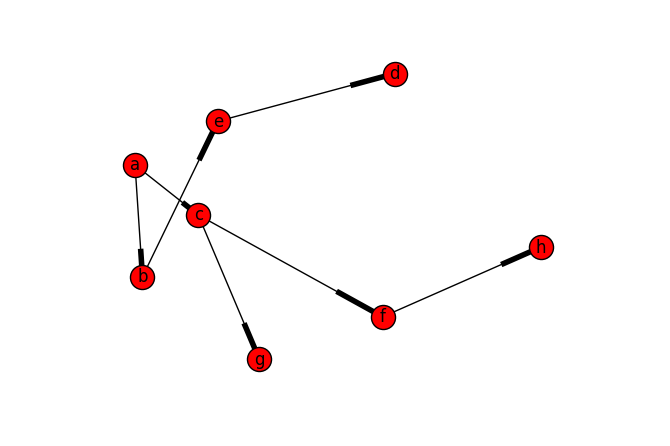

In [22]:
graphPlot(bfsTree)


# <span style="color:green"> Problems on Directed Graphs</span> 

## <span style="color:blue"> Reversed Graph</span>


it is drawn by reversing all edges  

#### helper function

In [44]:
def ReverseGraph(graph):
    revGraph = {node:[] for node in graph.keys()}
    
    for node in graph.keys():
        for vals in graph[node][0]:
            revGraph[vals].extend(node)
    for node in graph.keys():
        revGraph[node] = [revGraph[node],graph[node][1]]
    return revGraph
        

#### reversing the graph

In [45]:
revGraph = ReverseGraph(sampleGraph)

In [46]:
revGraph

{'a': [[], []],
 'b': [['d', 'a'], ['a', 'd']],
 'c': [['a', 'b'], ['a', 'b']],
 'd': [['e'], ['e']],
 'e': [['h', 'b'], ['b', 'h']],
 'f': [['c'], ['c']],
 'g': [['h', 'c'], ['c', 'h']],
 'h': [['f'], ['f']]}

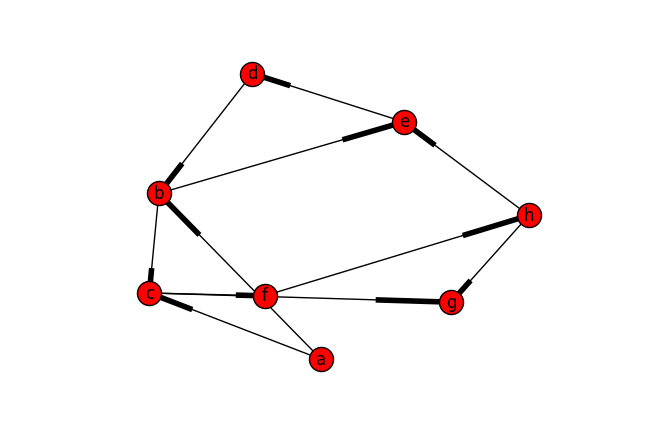

In [70]:
# original graph
graphPlot(sampleGraph)

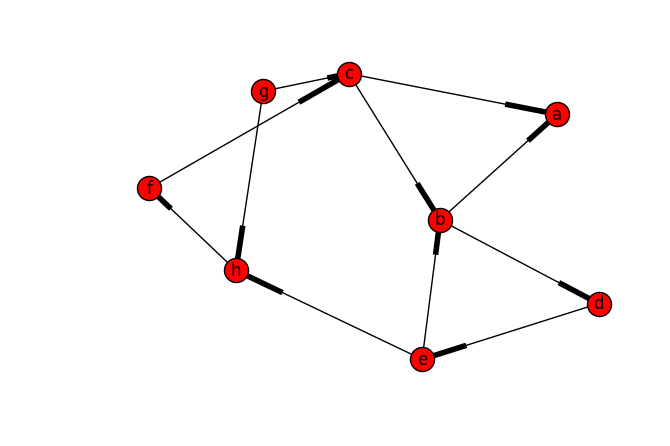

In [71]:
# reversed graph
graphPlot(revGraph)

## <span style="color:blue"> finding paths towards a node in a normal Graph</span>

* create a reverse graph
* create a BFS of that reverse graph with the node as the root
* reverse the BFS again to get correct directions

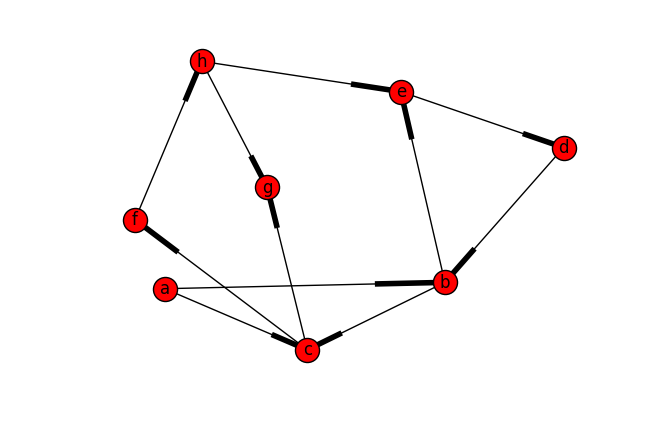

In [69]:
graphPlot(sampleGraph)

### <span style="color:red"> Example : find all routes towards "G" node</span>

In [64]:
# reversing the graph
revGraph = ReverseGraph(sampleGraph)

#### running BFS on Reversed graph with root "g"

In [65]:
root = "g"
revBfsTree,revBfsLayer = BFS(root,revGraph)

In [66]:
revBfsTree = ReverseGraph(revBfsTree)

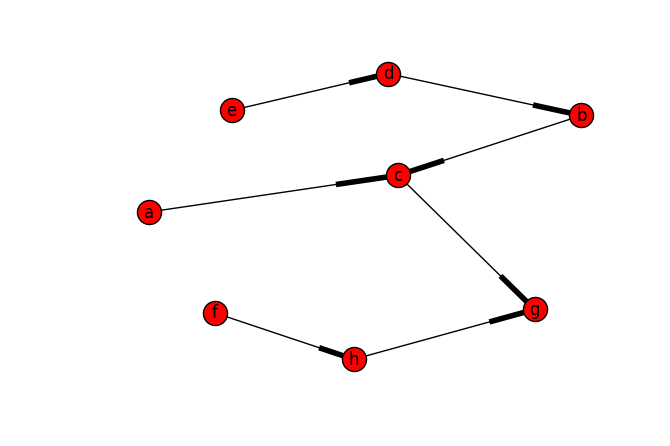

In [67]:
graphPlot(revBfsTree)

## <span style="color:blue"> Mutual Reachability and Strong Connectivity</span>

* two nodes u and v are mutually reachable if
    * there is a path from **u to v** , as well as from **v to u**
* a graph shows **strong connectivity** if every two pairs of nodes are mutually reachable